## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 


In [39]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,5)
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np




---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 

Import each of the two data sources and store them into their individual dataframes. 

Print descriptive statistics for each of the dataframes.

In [10]:
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')
print(dataframe_raw.describe()) 
print(dataframe_raw.info())
print(dataframe_stdev.describe())
print(dataframe_stdev.info()) 

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

--------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 


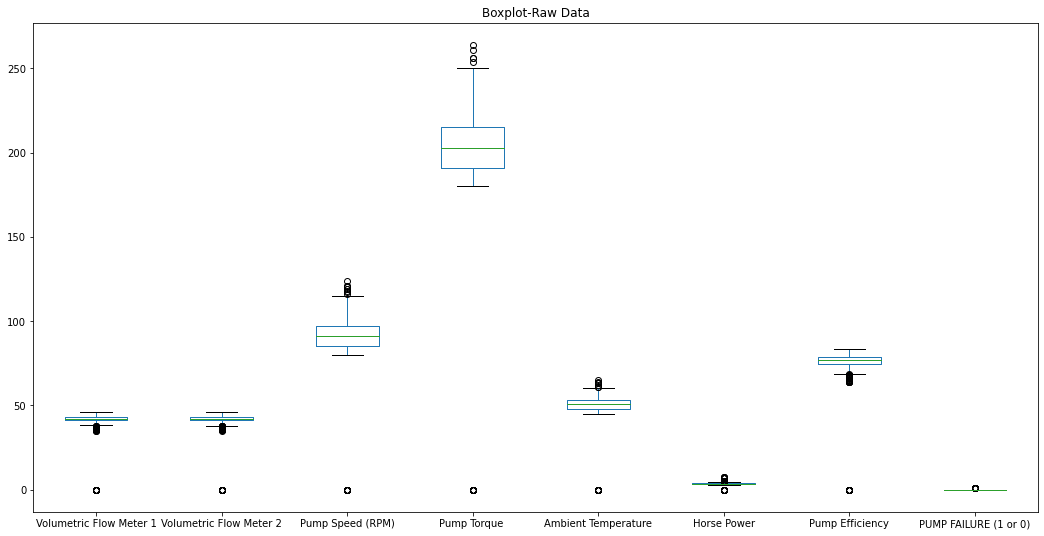

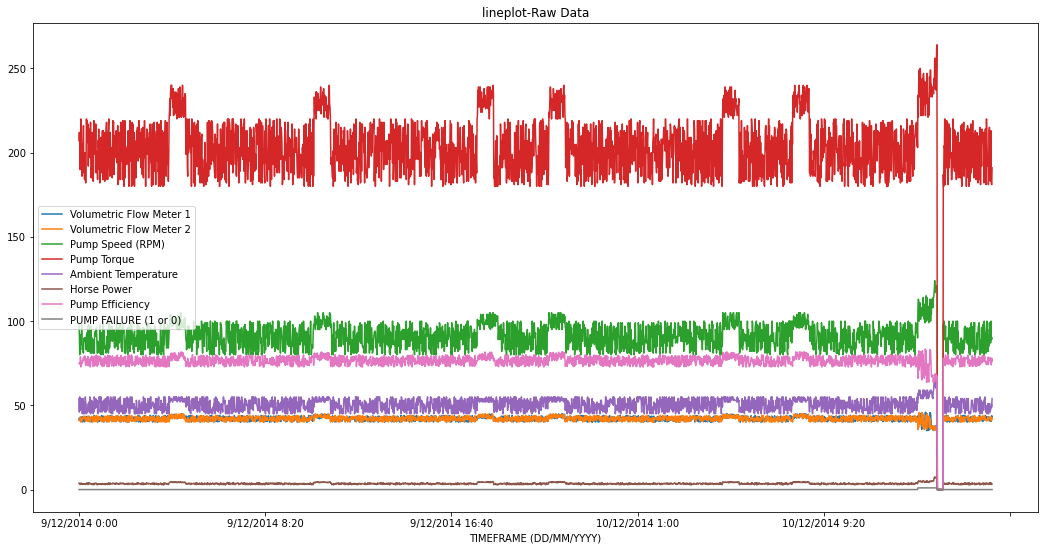

In [25]:
dataframe_raw.plot(kind='box',figsize=(18,9),title='Boxplot-Raw Data')
dataframe_raw.plot(x='TIMEFRAME (DD/MM/YYYY)',kind='line',title='lineplot-Raw Data',figsize=(18,9)) 


### **Observation from the boxplot and line plots?**

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 



0    False
1    False
2    False
3    False
4    False
Name: PUMP FAILURE (1 or 0), dtype: bool
(52, 10)
       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count                52.000000                52.000000         52.000000   
mean                 39.256154                39.012885        108.846154   
std                   3.582999                 3.190034          6.786332   
min                  35.010000                35.030000         99.000000   
25%                  36.422500                36.757500        103.000000   
50%                  37.640000                37.555000        108.000000   
75%                  41.432500                41.700000        114.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count     52.000000            52.000000    52.000000        52.000000   
mean     238.788462            57.711538     5.199808

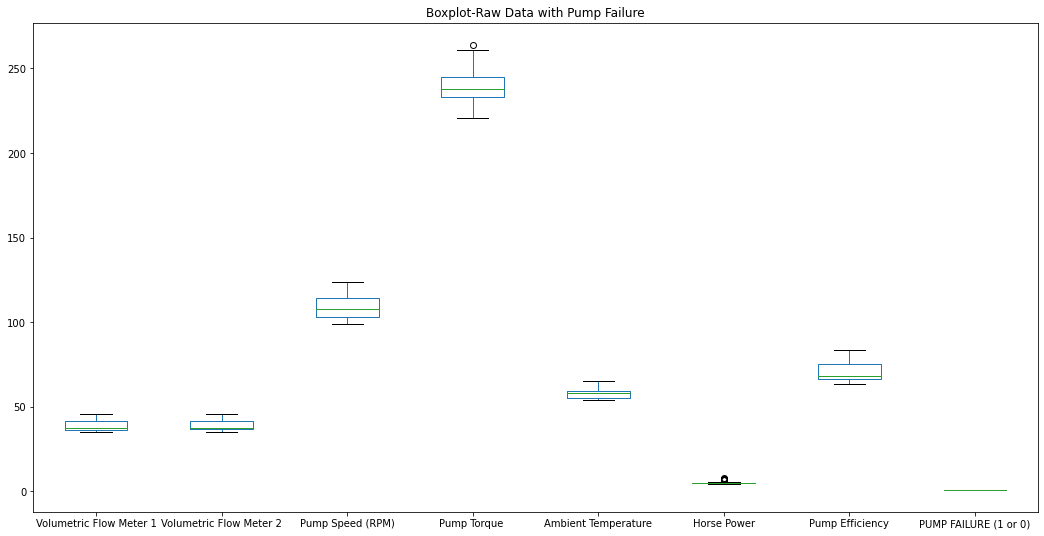

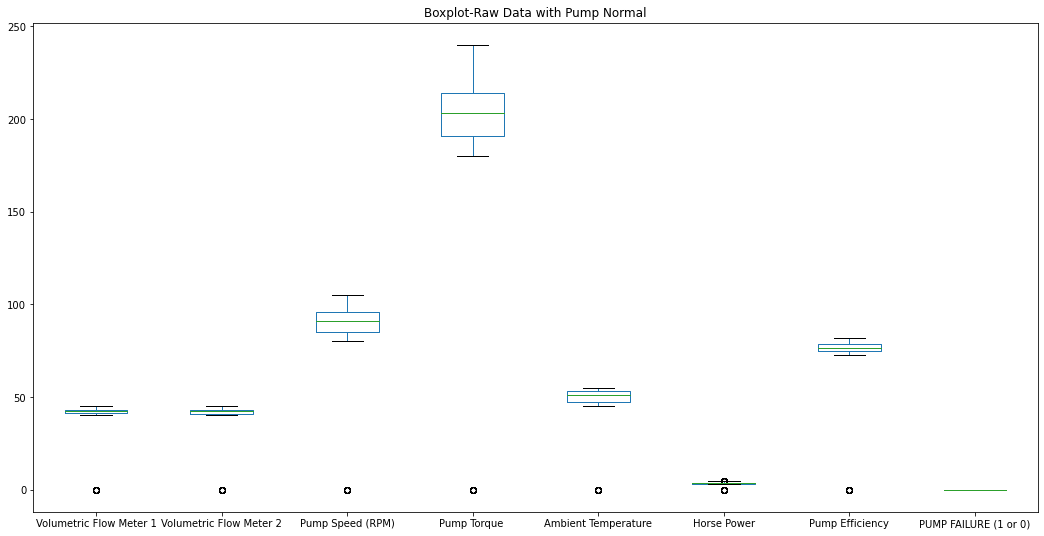

In [37]:
Pump_Failure = dataframe_raw['PUMP FAILURE (1 or 0)']==1
print(Pump_Failure.head())
dataframe_raw_failure=dataframe_raw[Pump_Failure]
print(dataframe_raw_failure.shape) 
print(dataframe_raw_failure.describe())
dataframe_raw_failure.plot(title='Boxplot-Raw Data with Pump Failure',kind='box',figsize=(18,9)) 

Pump_Normal= dataframe_raw['PUMP FAILURE (1 or 0)']==0
dataframe_raw_normal=dataframe_raw[Pump_Normal]
print(dataframe_raw_normal.describe()) 
dataframe_raw_normal.plot(title='Boxplot-Raw Data with Pump Normal',kind='box',figsize=(18,9))







### Observations when compare the dataset in this manner

---------------------------------------------------------------------------

### Detect Outliers by Quartiles Method
### Step 5: <span style="color:green">Creat Quartiles</span> 


In [58]:
Q1=dataframe_raw[:].quantile(0.25) 
print(Q1)

Q3=dataframe_raw[:].quantile(0.75)
print(Q3) 

IQR=Q3-Q1
print(IQR) 



Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64
Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64
Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

Calculate how many entries in the original dataframe.

Using the quartiles and IQR previously calculated, identify the number of entries left if remove the outliers.

Find the proportion of outliers that exist in the dataset.



In [10]:
import pandas as pd
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
Q1=dataframe_raw[:].quantile(0.25) 
print(Q1)

Q3=dataframe_raw[:].quantile(0.75)
print(Q3) 

IQR=Q3-Q1

print(dataframe_raw.count()) 
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

dataframe_raw_out=dataframe_raw[~((dataframe_raw<lower)|(dataframe_raw>upper)).any(axis=1)]
print(dataframe_raw_out.shape)

print('entries in original dataframe: 2453')
print('no. of entries after removing outliers:',2453-2358)
print('proportion of outliers:', 2358/2453) 


Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64
Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64
Data Source                2453
TIMEFRAME (DD/MM/YYYY)     2453
Volumetric Flow Meter 1    2453
Volumetric Flow Meter 2    2453
Pump Speed (RPM)           2453
Pump Torque                2453
Ambient Temperature        2453
Horse Power                2453
Pump Efficiency            2453
PUMP FAILURE (1 or 0)      2453
dtype: int64
(2358, 10)
entries in original dataframe: 2453
no. of entries after r

### Observations so far

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1 

ii) A boxplot when PUMP FAILURE is 0 



0


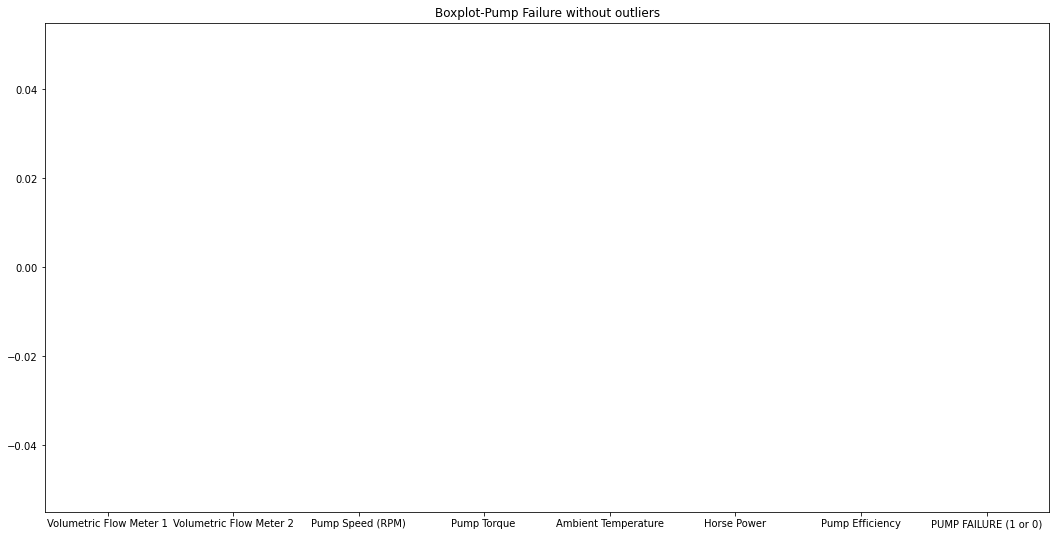

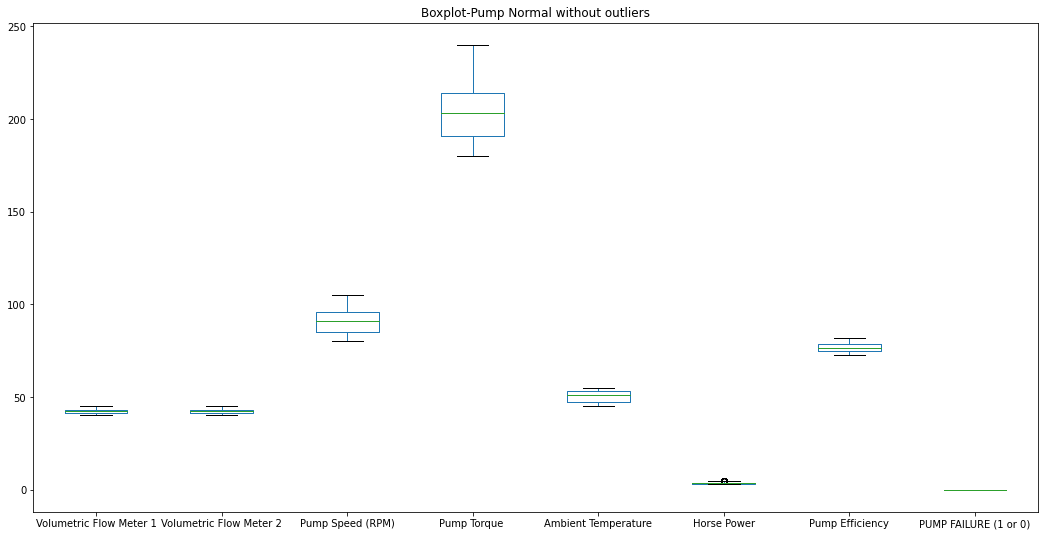

In [66]:
Q1=dataframe_raw[:].quantile(0.25) 
Q3=dataframe_raw[:].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
dataframe_raw_out=dataframe_raw[~((dataframe_raw<lower)|(dataframe_raw>upper)).any(axis=1)]
Pump_Failure_out = dataframe_raw_out['PUMP FAILURE (1 or 0)']==1
Pump_Normal_out= dataframe_raw_out['PUMP FAILURE (1 or 0)']==0 
dataframe_failure_out=dataframe_raw_out[Pump_Failure_out]
dataframe_normal_out=dataframe_raw_out[Pump_Normal_out]

print(len(dataframe_failure_out)) 
dataframe_failure_out.plot(title='Boxplot-Pump Failure without outliers',kind='box',figsize=(18,9))


dataframe_normal_out.plot(title='Boxplot-Pump Normal without outliers',kind='box',figsize=(18,9))


### Observations so far

For this case study, we actually shouldn't remove the outliers, as we are attempting to understand the Pump Failure Behavior and the portion of data we need is actually stored WITHIN the Outliers.

The lesson is we should never remove Outliers without Subject Matter Expertise input. Otherwise valuable information may be discarded.

-----

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 
    
#### Loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends.

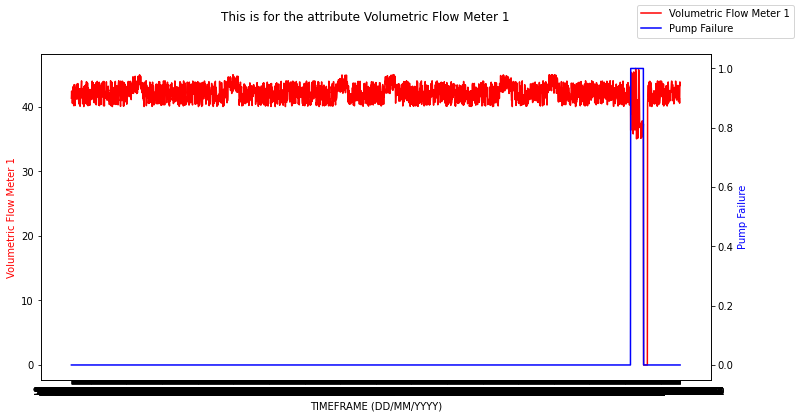

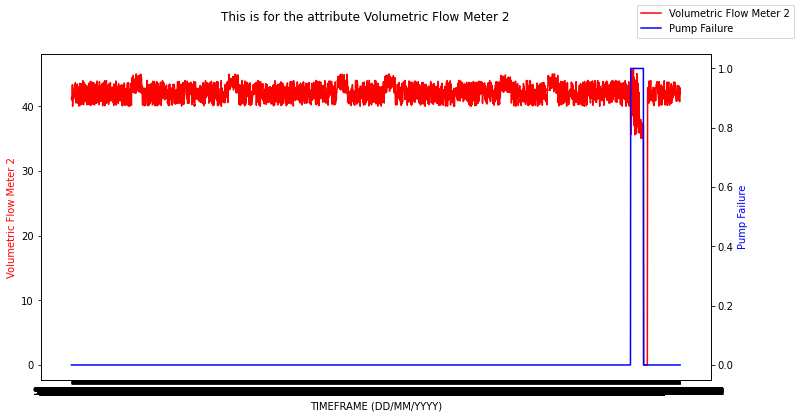

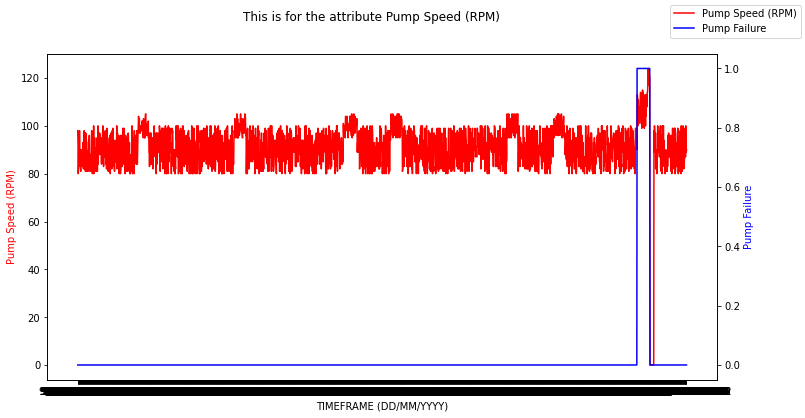

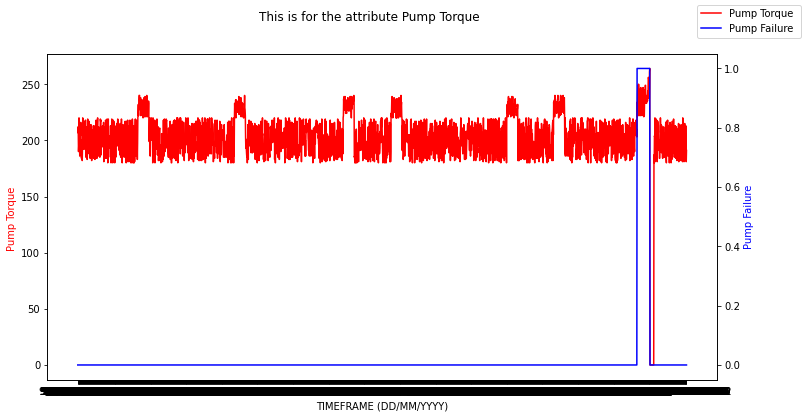

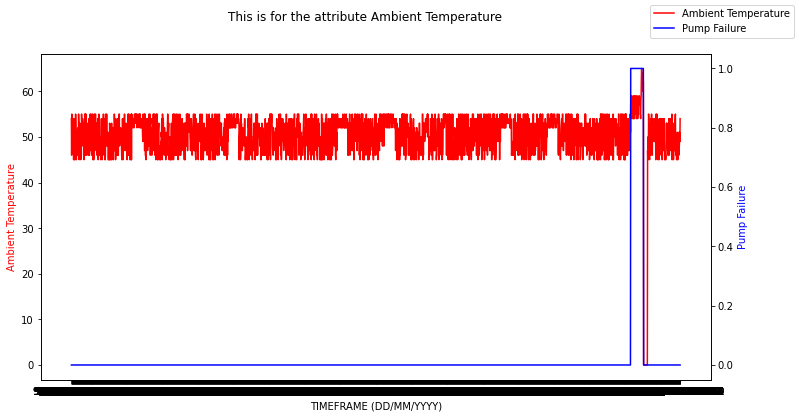

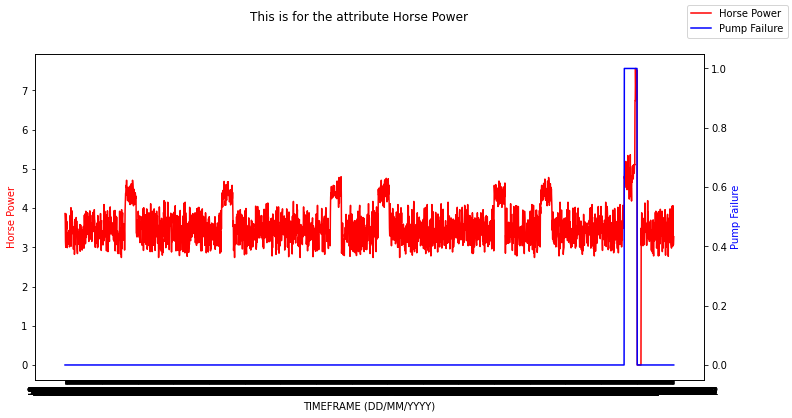

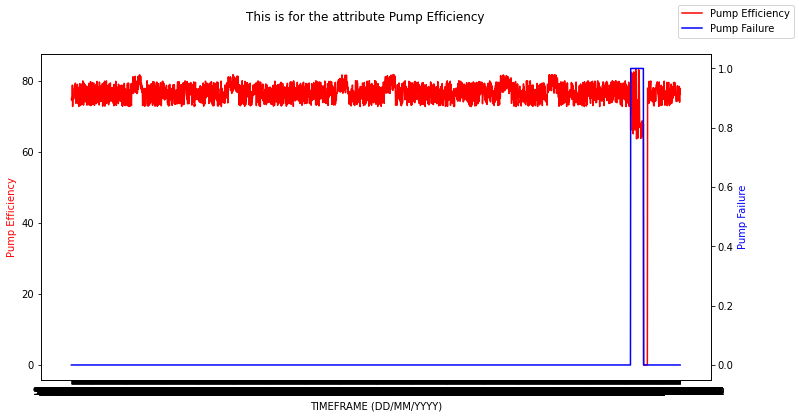

In [87]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,5)
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np


dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
new_dataframe = dataframe_raw.select_dtypes(include=np.number)
newdf=new_dataframe.iloc[:,:7]

for column in newdf:
    columndata=newdf[column]
    fig, ax1 = plt.subplots(figsize=(12,6))
    fig.suptitle('This is for the attribute '+column)

    ax1.set_xlabel('TIMEFRAME (DD/MM/YYYY)')
    ax1.set_ylabel(column, color='red')
    plt.xticks=(np.arange(1000))
    
    lns1=ax1.plot(dataframe_raw['TIMEFRAME (DD/MM/YYYY)'],columndata, color='red',label=column)    
    ax2=ax1.twinx()
    lns2=ax2.plot(dataframe_raw['TIMEFRAME (DD/MM/YYYY)'],dataframe_raw['PUMP FAILURE (1 or 0)'],color='blue',label='Pump Failure')
    ax2.set_ylabel('Pump Failure', color='blue')
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    fig.legend(lns, labs, loc='upper right')


### Observations so far

In [ ]:
The biggest fluctuation, or outlier, happens when the pump fails.


---

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

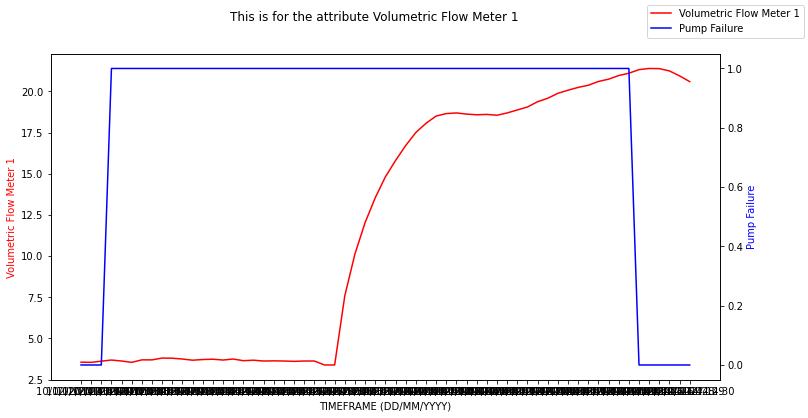

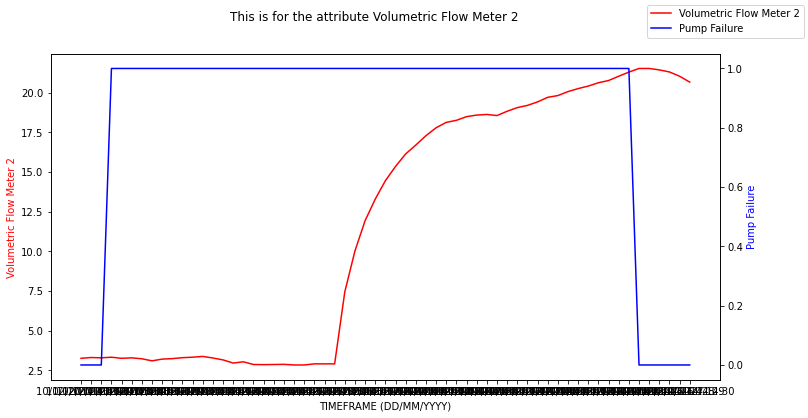

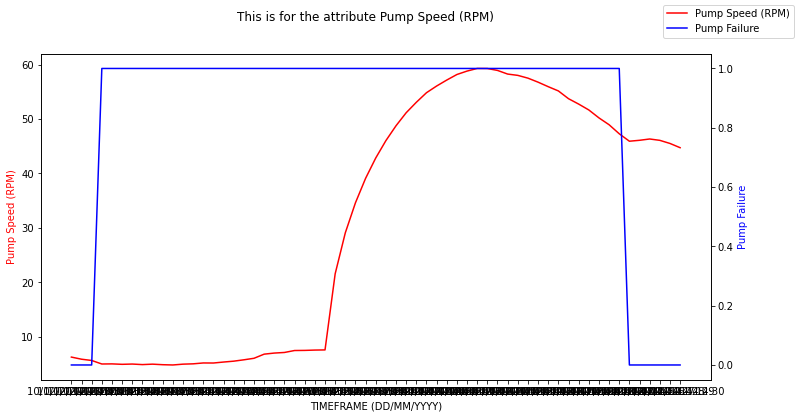

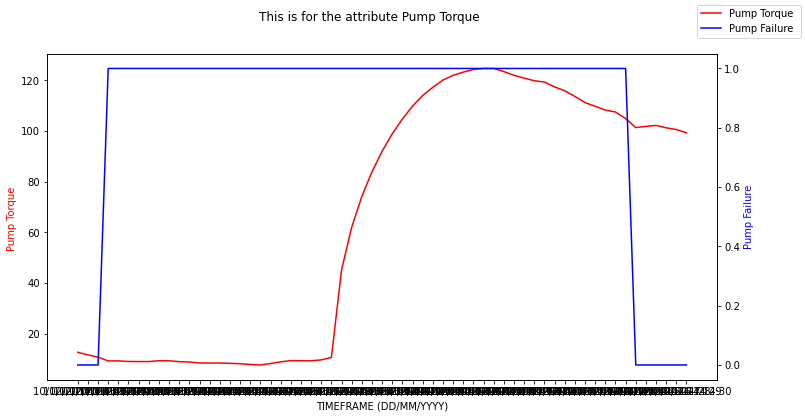

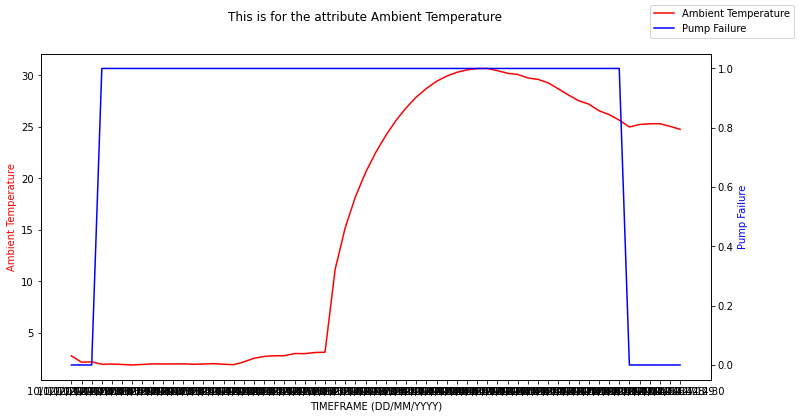

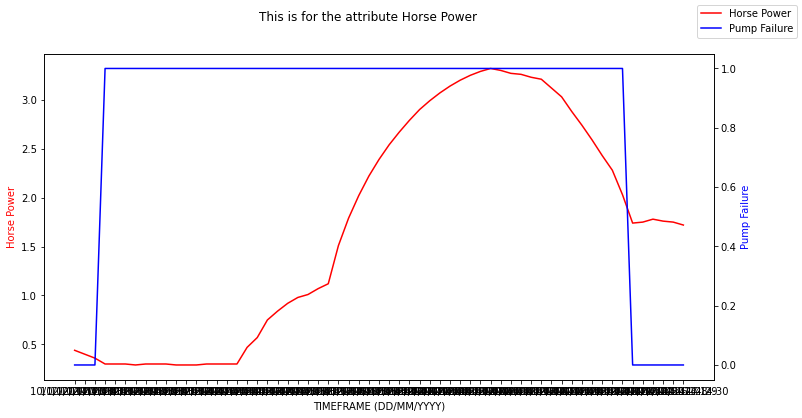

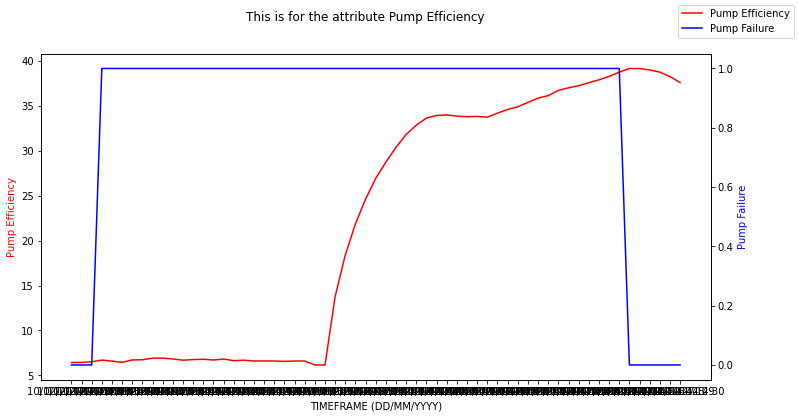

In [85]:
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')
dataframe_time=dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')
dataframe_time_filtered=dataframe_stdev[(dataframe_time.index>='10/12/2014 13:30')&(dataframe_time.index<='10/12/2014 14:30')]
dataframe_time_filtered.head()
dataframe=dataframe_time_filtered.select_dtypes(include=np.number)
df=dataframe.iloc[:,:7]
df.head()

for column in df:
    column_stdev=df[column]
    fig, ax_left = plt.subplots(figsize=(12,6))
    fig.suptitle('This is for the attribute '+column)

    ax_left.set_xlabel('TIMEFRAME (DD/MM/YYYY)')
    ax_left.set_ylabel(column, color='red')
    
    lns3=ax_left.plot(dataframe_time_filtered['TIMEFRAME (DD/MM/YYYY)'],column_stdev, color='red',label=column)    
    ax_right=ax_left.twinx()
    lns4=ax_right.plot(dataframe_time_filtered['TIMEFRAME (DD/MM/YYYY)'],dataframe_time_filtered['PUMP FAILURE (1 or 0)'],color='blue',label='Pump Failure')
    ax_right.set_ylabel('Pump Failure', color='blue')
    lns_stdev = lns3+lns4
    labs_stdev = [l.get_label() for l in lns_stdev]
    fig.legend(lns_stdev, labs_stdev, loc='upper right')
    



---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>


### Step 10: <span style="color:purple">Creat heatmap to see the correlations between variables</span>

Text(0.5, 1.0, 'Heatmap w/ respect to Failure Mode with Raw Features')

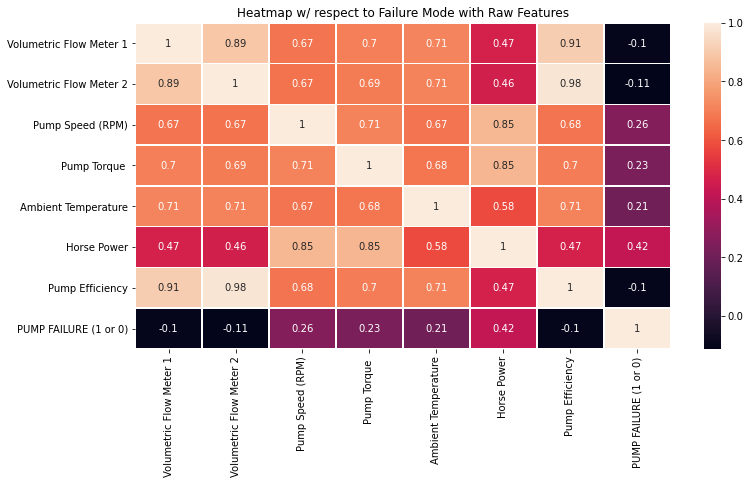

In [37]:
dataframe_raw=pd.read_csv('DF_Raw_Data.csv')
import seaborn as sns
fig.ax=plt.subplots(figsize=(12,6))
sns.heatmap(dataframe_raw.corr(),annot=True,linewidths=0.5)  

plt.title('Heatmap w/ respect to Failure Mode with Raw Features') 


### Observations so far

Pump Speed (0.26) and Hourse Power (0.42) are correlated with pump failure.

---------------------------------------------------------------------------


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

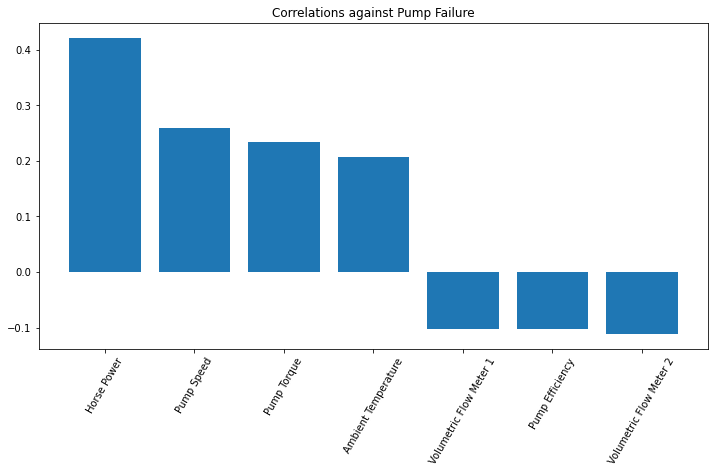

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
dataframe_raw=pd.read_csv('DF_Raw_Data.csv')
v1=dataframe_raw['Volumetric Flow Meter 1'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
v2=dataframe_raw['Volumetric Flow Meter 2'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
speed=dataframe_raw['Pump Speed (RPM)'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
torque=dataframe_raw['Pump Torque '].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
temp=dataframe_raw['Ambient Temperature'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
power=dataframe_raw['Horse Power'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
eff=dataframe_raw['Pump Efficiency'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
x=['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed','Pump Torque','Ambient Temperature','Horse Power','Pump Efficiency']
y=[v1,v2,speed,torque,temp,power,eff]
df=pd.DataFrame({"Variable":x,"Correlations":y})
df_sorted_desc=df.sort_values('Correlations',ascending=False)
plt.figure(figsize=(12,6))
plt.bar('Variable','Correlations',data=df_sorted_desc)
plt.title('Correlations against Pump Failure')
plt.xticks(rotation=60)


---------------------------------------------------------------------------

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 


Text(0.5, 1.0, 'Heatmap w/ respect to Failure Mode with Rolling Stdev Features')

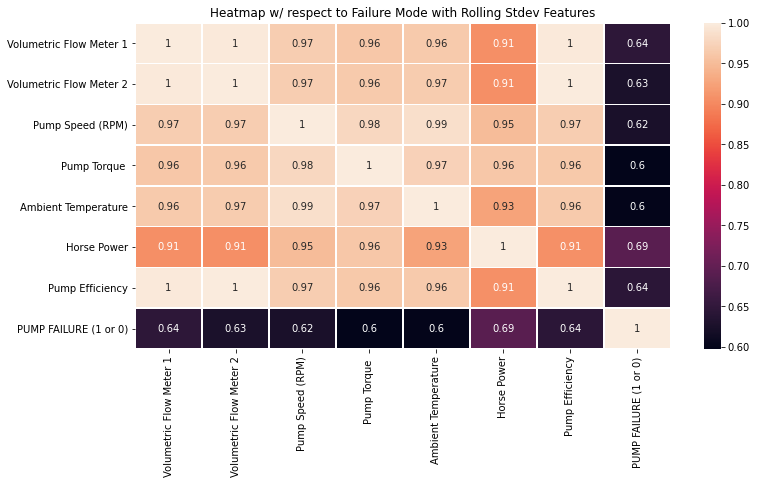

In [10]:
dataframe_stdev=pd.read_csv('DF_Rolling_Stdev.csv')
import seaborn as sns
plt.subplots(figsize=(12,6))
sns.heatmap(dataframe_stdev.corr(),annot=True,linewidths=0.5)  

plt.title('Heatmap w/ respect to Failure Mode with Rolling Stdev Features')

### Observations so far

The correlations among all variables turn to be stronger (R is bigger than 0.6). 
All variables have stronger relations against PUMP FAILURE, especially for Horse Power, Pump Efficiency and Volumetric Flow Meter 1.


---------------------------------------------------------------------------

### Creating a Multivariate Regression Model


### Step 13: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all independent variables, which include every other variable that is not PUMP FAILURE (1 or 0).

ii) Repeat i) but this time use the dataframe_stdev


In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
dataframe_raw_time=dataframe_raw.set_index('TIMEFRAME (DD/MM/YYYY)')
X=dataframe_raw_time[['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']]
y=dataframe_raw_time['PUMP FAILURE (1 or 0)']
X=sm.add_constant(X)
est1=sm.OLS(y,X).fit()
est1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Wed, 30 Dec 2020   Prob (F-statistic):          5.58e-233
Time:                           00:53:06   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
dataframe_stdev=pd.read_csv('DF_Rolling_Stdev.csv')
import statsmodels.api as sm
from statsmodels.formula.api import ols
dataframe_time=dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')
X_stdev=dataframe_time[['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']]
y_stdev=dataframe_time['PUMP FAILURE (1 or 0)']
X_stdev=sm.add_constant(X_stdev)
est2=sm.OLS(y_stdev,X_stdev).fit()
est2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Wed, 30 Dec 2020   Prob (F-statistic):               0.00
Time:                           00:55:58   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations so far

The linear regression model with dataframe_stdev is a better fit, because the R-square is higher (0.778 > 0.362).


---------------------------------------------------------------------------

### Step 14: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation in the previous step and apply the .predict() function to the dataframe to see whether or not the model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'


In [93]:
y_actual_failure=pd.Series(y_stdev)
y_actual_failure=y_actual_failure[y_actual_failure>=1]

y_predict=est2.predict(X_stdev)
y_predict_failure=pd.Series(y_predict)
y_predict_failure=y_predict_failure[y_predict_failure>=1]


df_failure=pd.DataFrame({'Actual Failure':y_actual_failure,'Predict Failure':y_predict_failure})
print(df_failure)
df_failure.info()

                  Actual Failure  Predict Failure
10/12/2014 13:33               1              NaN
10/12/2014 13:34               1              NaN
10/12/2014 13:35               1              NaN
10/12/2014 13:36               1              NaN
10/12/2014 13:37               1              NaN
10/12/2014 13:38               1              NaN
10/12/2014 13:39               1              NaN
10/12/2014 13:40               1              NaN
10/12/2014 13:41               1              NaN
10/12/2014 13:42               1              NaN
10/12/2014 13:43               1              NaN
10/12/2014 13:44               1              NaN
10/12/2014 13:45               1              NaN
10/12/2014 13:46               1              NaN
10/12/2014 13:47               1              NaN
10/12/2014 13:48               1              NaN
10/12/2014 13:49               1         1.008608
10/12/2014 13:50               1         1.052401
10/12/2014 13:51               1         1.112351


### Observations so far

The model only picks up 13 Pump Failure events out of 52 actual failure events.


---------------------------------------------------------------------------

Text(0.5, 1.0, 'Pump Failure Prediction')

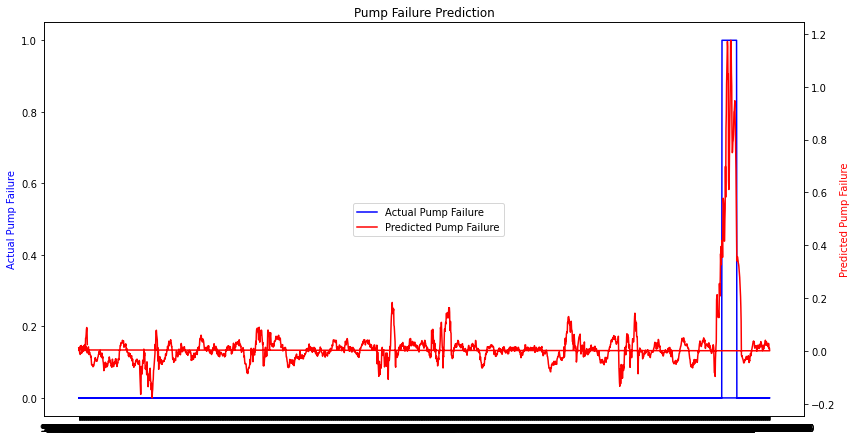

In [121]:
y_predict=est2.predict(X_stdev)

fig, ax1 = plt.subplots(figsize=(12,6))

ln1=ax1.plot(dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'],y_stdev,color='blue',label='Actual Pump Failure')
ax1.set_ylabel('Actual Pump Failure',color='blue')
ax2=ax1.twinx()
ln2=ax2.plot(dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'],y_predict,color='red',label='Predicted Pump Failure')
ax2.set_ylabel('Predicted Pump Failure',color='red')
lns=ln1+ln2
labs=[l.get_label() for l in lns]
fig.legend(lns,labs,loc='center')
fig.tight_layout()

plt.title('Pump Failure Prediction')


    
